<a href="https://colab.research.google.com/github/showmeinfinity/final_project/blob/main/Step_4_Running_classifiers_based_on_demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
offensiveness_popquorn = pd.read_csv("offensiveness_popquorn_cleaned.csv")

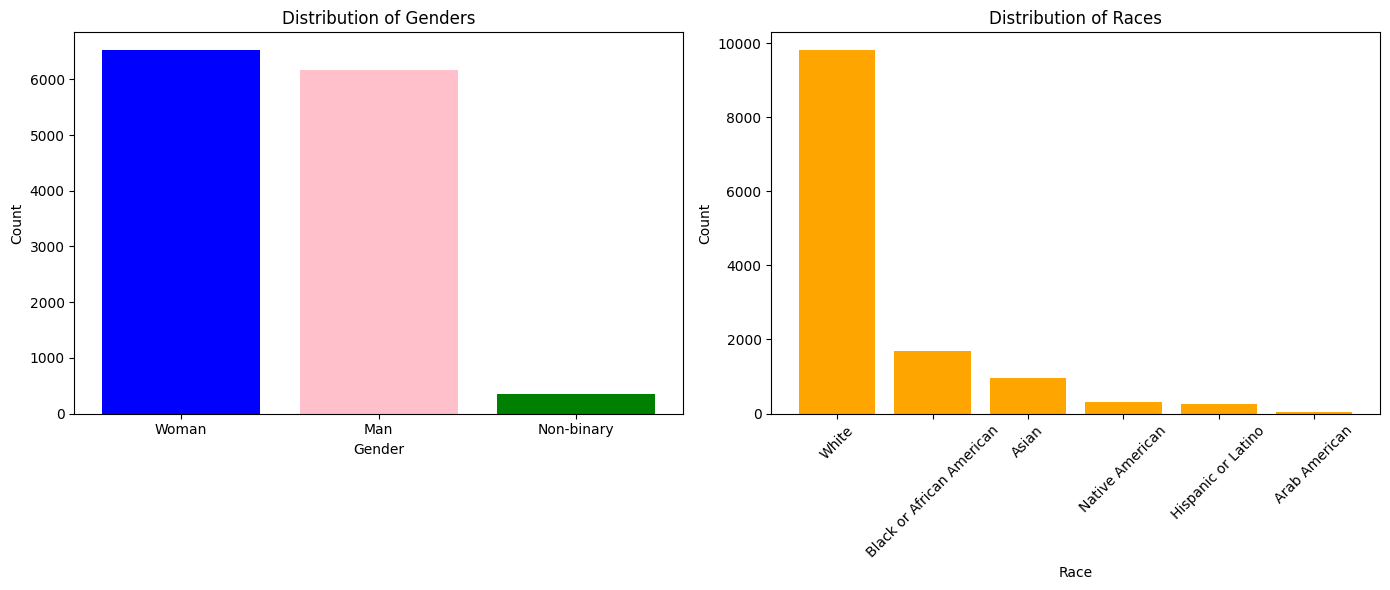

In [ ]:
# Count the occurrences of each unique gender and race
gender_counts = offensiveness_popquorn['gender'].value_counts()
race_counts = offensiveness_popquorn['race'].value_counts()

# Plot the bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gender bar chart
ax1.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink', 'green'])
ax1.set_title('Distribution of Genders')
ax1.set_ylabel('Count')
ax1.set_xlabel('Gender')

# Race bar chart
ax2.bar(race_counts.index, race_counts.values, color='orange')
ax2.set_title('Distribution of Races')
ax2.set_ylabel('Count')
ax2.set_xlabel('Race')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


GENDER

In [ ]:
# Display the counts for genders and races
gender_counts_df = gender_counts.reset_index().rename(columns={'index': 'Gender', 'gender': 'Count'})
race_counts_df = race_counts.reset_index().rename(columns={'index': 'Race', 'race': 'Count'})

gender_counts_df, race_counts_df


(       Gender  Count
 0       Woman   6520
 1         Man   6166
 2  Non-binary    350,
                         Race  Count
 0                      White   9804
 1  Black or African American   1685
 2                      Asian    949
 3            Native American    299
 4         Hispanic or Latino    250
 5              Arab American     49)

In [ ]:
# Split the merged_df based on gender
woman_df = offensiveness_popquorn[offensiveness_popquorn['gender'] == 'Woman']
man_df = offensiveness_popquorn[offensiveness_popquorn['gender'] == 'Man']
non_binary_df = offensiveness_popquorn[offensiveness_popquorn['gender'] == 'Non-binary']

woman_df.head(), man_df.head(), non_binary_df.head()


(    instance_id  user_id                                               text  \
 3           530      111  I think a lot of Dethklok songs use drop C, wo...   
 5           530      168  I think a lot of Dethklok songs use drop C, wo...   
 7           530      254  I think a lot of Dethklok songs use drop C, wo...   
 14         1280      209  There are relatively simple ways around all of...   
 18          621       62  Tell the british soldier in WW1 to shoot that ...   
 
     offensiveness gender                       race    age occupation  \
 3             0.0  Woman                      White  40-44   Employed   
 5             0.0  Woman                      White  50-54  Homemaker   
 7             1.0  Woman                      Asian  35-39   Employed   
 14            1.0  Woman                      White    >65    Retired   
 18            1.0  Woman  Black or African American  54-59   Employed   
 
                             education  hard_label  soft_label.0  soft_l

In [ ]:
# Function to restructure dataframes based on the given requirements
def restructure_df(df):
    # Aggregate user_ids by instance_id
    aggregated_user_ids = df.groupby('instance_id')['user_id'].apply(lambda x: ','.join(map(str, x))).reset_index()

    # Select one row for each unique instance_id
    reduced_df = df.drop(columns=['gender', 'race', 'age', 'occupation', 'education']).drop_duplicates(subset='instance_id')

    # Merge the aggregated user_ids
    restructured_df = reduced_df.merge(aggregated_user_ids, on='instance_id', suffixes=('', '_aggregated'))
    restructured_df = restructured_df.drop(columns='user_id')
    restructured_df = restructured_df.rename(columns={'user_id_aggregated': 'user_ids'})

    return restructured_df

# Apply the function to the gender-based dataframes
woman_restructured = restructure_df(woman_df)
man_restructured = restructure_df(man_df)
non_binary_restructured = restructure_df(non_binary_df)

woman_restructured.head()


,instance_id,text,offensiveness,hard_label,soft_label.0,soft_label.1,cleaned_text,user_ids
0,530,"I think a lot of Dethklok songs use drop C, wo...",0.0,0,0.875,0.125,"i think a lot of dethklok songs use drop c, wo...","111,168,254"
1,1280,There are relatively simple ways around all of...,1.0,1,0.250,0.750,there are relatively simple ways around all of...,209
2,621,Tell the british soldier in WW1 to shoot that ...,1.0,1,0.500,0.500,tell the british soldier in ww1 to shoot that ...,"62,138,219,241"
3,676,Top comment pretty much. I have gay friends an...,0.0,0,0.875,0.125,top comment pretty much. i have gay friends an...,"68,115,262"
4,635,Don't tell them just let them and their liniag...,1.0,1,0.250,0.750,do not tell them just let them and their linia...,"145,215,244"


In [ ]:
# Combine the three gender dataframes into one combined dataframe
combined_df = pd.concat([woman_restructured, man_restructured, non_binary_restructured], ignore_index=True)

# Display the first few rows of the combined dataframe
combined_df.head()


,instance_id,text,offensiveness,hard_label,soft_label.0,soft_label.1,cleaned_text,user_ids
0,530,"I think a lot of Dethklok songs use drop C, wo...",0.0,0,0.875,0.125,"i think a lot of dethklok songs use drop c, wo...","111,168,254"
1,1280,There are relatively simple ways around all of...,1.0,1,0.250,0.750,there are relatively simple ways around all of...,209
2,621,Tell the british soldier in WW1 to shoot that ...,1.0,1,0.500,0.500,tell the british soldier in ww1 to shoot that ...,"62,138,219,241"
3,676,Top comment pretty much. I have gay friends an...,0.0,0,0.875,0.125,top comment pretty much. i have gay friends an...,"68,115,262"
4,635,Don't tell them just let them and their liniag...,1.0,1,0.250,0.750,do not tell them just let them and their linia...,"145,215,244"


In [ ]:
# Finding the unique values and their counts for each gender category
unique_woman_counts = woman_restructured['offensiveness'].value_counts()
unique_men_counts = man_restructured['offensiveness'].value_counts()
unique_nonbinary_counts = non_binary_restructured['offensiveness'].value_counts()
combined_df_counts = combined_df['offensiveness'].value_counts()

unique_woman_counts, unique_men_counts, unique_nonbinary_counts, combined_df_counts


(0.0    960
 1.0    529
 Name: offensiveness, dtype: int64,
 0.0    837
 1.0    655
 Name: offensiveness, dtype: int64,
 0.0    192
 1.0    128
 Name: offensiveness, dtype: int64,
 0.0    1989
 1.0    1312
 Name: offensiveness, dtype: int64)

In [ ]:
woman_restructured.to_csv("woman_restructured.csv", index=False)
man_restructured.to_csv("man_restructured.csv", index=False)
non_binary_restructured.to_csv("non_binary_restructured.csv", index=False)
combined_df.to_csv("combined_df.csv", index=False)


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, Dataset
import torch

# Define the HateSpeechDataset class
class HateSpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


def train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs, patience=2):
    loss_values = []
    validation_loss_values = []
    best_val_loss = float('inf')  # initially set to infinity
    counter = 0  # count the number of epochs with no improvement in validation loss

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        print("-" * 10)

        # Training
        model.train()
        total_loss = 0
        for batch in tqdm(train_dataloader):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()
        avg_train_loss = total_loss / len(train_dataloader)
        loss_values.append(avg_train_loss)

        # Validation
        model.eval()
        total_eval_loss = 0
        for batch in tqdm(validation_dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_eval_loss += loss.item()
        avg_val_loss = total_eval_loss / len(validation_dataloader)
        validation_loss_values.append(avg_val_loss)

        print(f"Training loss: {avg_train_loss}, Validation loss: {avg_val_loss}")

        # Check if the validation loss has improved
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0  # reset the counter
            torch.save(model.state_dict(), 'best_model.pt')  # save the model weights
        else:
            counter += 1  # increment the counter
            if counter >= patience:
                print(f"Early stopping after {patience} epochs with no improvement")
                model.load_state_dict(torch.load('best_model.pt'))  # load the best model weights
                break

    return loss_values, validation_loss_values


def evaluate(model, dataloader, device):
    model.eval()
    predictions, true_labels = [], []
    for batch in tqdm(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        predictions.append(logits)
        true_labels.append(label_ids)
    predictions = np.concatenate(predictions, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)
    return predictions, true_labels


def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix", cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), title=title, ylabel='True label', xlabel='Predicted label')
    plt.show()


def plot_loss_curves(loss_values, validation_loss_values):
    plt.figure(figsize=(12, 6))
    plt.plot(loss_values, 'b-o', label="training loss")
    plt.plot(validation_loss_values, 'r-o', label="validation loss")
    plt.title("Learning curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Load the data
gender_dfs = {
    "woman": pd.read_csv("woman_restructured.csv"),
    "man": pd.read_csv("man_restructured.csv"),
    "non_binary": pd.read_csv("non_binary_restructured.csv"),
    "combined": pd.read_csv("combined_df.csv")
}

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Specify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modify the prepare_dataset_and_loaders function to use only the cleaned_text column
def prepare_dataset_and_loaders(df, tokenizer, device):
    # Use the cleaned_text column
    train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['cleaned_text'], df['hard_label'], test_size=.2, random_state=13)
    val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=.5, random_state=13)

    train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=128)
    test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=128)

    train_labels = torch.tensor(train_labels.tolist()).long()
    val_labels = torch.tensor(val_labels.tolist()).long()
    test_labels = torch.tensor(test_labels.tolist()).long()

    train_dataset = HateSpeechDataset(train_encodings, train_labels)
    val_dataset = HateSpeechDataset(val_encodings, val_labels)
    test_dataset = HateSpeechDataset(test_encodings, test_labels)

    train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
    validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=32)
    test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)

    return train_dataloader, validation_dataloader, test_dataloader, test_labels

# Train a separate model for each gender
gender_models = {}
for gender, df in gender_dfs.items():
    print(f"Training model for gender: {gender}")
    train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(df, tokenizer, device)
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.0)
    epochs = 4
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)
    loss_values, validation_loss_values = train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)
    predictions, true_labels = evaluate(model, test_dataloader, device)
    print(classification_report(true_labels, predictions.argmax(axis=1)))
    gender_models[gender] = model

print("Training model for combined data")

train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(gender_dfs["combined"], tokenizer, device)
combined_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
combined_model.to(device)
optimizer = AdamW(combined_model.parameters(), lr=2e-5, weight_decay=0.0)
epochs = 4
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)
loss_values, validation_loss_values = train(combined_model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)
predictions, true_labels = evaluate(combined_model, test_dataloader, device)
print(classification_report(true_labels, predictions.argmax(axis=1)))


Training model for gender: woman


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/36 [00:00<?, ?it/s]<ipython-input-23-3c8d775556ce>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 5/5 [00:00<00:00,  6.14it/s]


Training loss: 0.6537885549995635, Validation loss: 0.6330544710159302
Epoch 2/4
----------


100%|██████████| 5/5 [00:00<00:00,  6.16it/s]


Training loss: 0.5426418623990483, Validation loss: 0.5331817388534545
Epoch 3/4
----------


100%|██████████| 5/5 [00:00<00:00,  6.01it/s]


Training loss: 0.4038420485125648, Validation loss: 0.5052484750747681
Epoch 4/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.76it/s]


Training loss: 0.30272125059531796, Validation loss: 0.5048935055732727


100%|██████████| 5/5 [00:00<00:00,  6.02it/s]


              precision    recall  f1-score   support

           0       0.78      0.82      0.80        88
           1       0.67      0.62      0.65        53

    accuracy                           0.74       141
   macro avg       0.73      0.72      0.72       141
weighted avg       0.74      0.74      0.74       141

Training model for gender: man


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/36 [00:00<?, ?it/s]<ipython-input-23-3c8d775556ce>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 5/5 [00:00<00:00,  5.83it/s]


Training loss: 0.6722517493698332, Validation loss: 0.5994665861129761
Epoch 2/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.68it/s]


Training loss: 0.5778815853926871, Validation loss: 0.5237818241119385
Epoch 3/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.61it/s]


Training loss: 0.46013818432887393, Validation loss: 0.49918138384819033
Epoch 4/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.64it/s]


Training loss: 0.37072377444969284, Validation loss: 0.49273684024810793


100%|██████████| 5/5 [00:00<00:00,  5.73it/s]


              precision    recall  f1-score   support

           0       0.79      0.75      0.77        89
           1       0.61      0.65      0.63        52

    accuracy                           0.72       141
   macro avg       0.70      0.70      0.70       141
weighted avg       0.72      0.72      0.72       141

Training model for gender: non_binary


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/8 [00:00<?, ?it/s]<ipython-input-23-3c8d775556ce>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 1/1 [00:00<00:00,  6.88it/s]


Training loss: 0.7051541283726692, Validation loss: 0.6994391083717346
Epoch 2/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.76it/s]


Training loss: 0.6831969767808914, Validation loss: 0.6815962195396423
Epoch 3/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.74it/s]


Training loss: 0.6724840700626373, Validation loss: 0.6748465895652771
Epoch 4/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


Training loss: 0.6625017151236534, Validation loss: 0.672480046749115


100%|██████████| 1/1 [00:00<00:00,  4.77it/s]


              precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.50      0.50      0.50        10

    accuracy                           0.68        31
   macro avg       0.63      0.63      0.63        31
weighted avg       0.68      0.68      0.68        31

Training model for gender: combined


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/78 [00:00<?, ?it/s]<ipython-input-23-3c8d775556ce>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 10/10 [00:02<00:00,  4.85it/s]


Training loss: 0.6456837447789999, Validation loss: 0.5137886255979538
Epoch 2/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.82it/s]


Training loss: 0.4121841486447897, Validation loss: 0.39960488080978396
Epoch 3/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.84it/s]


Training loss: 0.19808167945115995, Validation loss: 0.2223225936293602
Epoch 4/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.80it/s]


Training loss: 0.10924932494377479, Validation loss: 0.19534812942147256


100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       190
           1       0.94      0.86      0.90       122

    accuracy                           0.92       312
   macro avg       0.93      0.91      0.92       312
weighted avg       0.92      0.92      0.92       312

Training model for combined data


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/78 [00:00<?, ?it/s]<ipython-input-23-3c8d775556ce>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 10/10 [00:02<00:00,  4.79it/s]


Training loss: 0.6311964893188232, Validation loss: 0.4707207947969437
Epoch 2/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.76it/s]


Training loss: 0.340874433135375, Validation loss: 0.25387399047613146
Epoch 3/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.73it/s]


Training loss: 0.13593570128656352, Validation loss: 0.16339988298714161
Epoch 4/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.79it/s]


Training loss: 0.07395813224884944, Validation loss: 0.146955013461411


100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       190
           1       0.95      0.86      0.91       122

    accuracy                           0.93       312
   macro avg       0.94      0.92      0.92       312
weighted avg       0.93      0.93      0.93       312



Training model for gender: woman


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/36 [00:00<?, ?it/s]<ipython-input-24-3feab5fb437d>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 5/5 [00:00<00:00,  5.57it/s]


Training loss: 0.6784563693735335, Validation loss: 0.6760132312774658
Epoch 2/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.65it/s]


Training loss: 0.6360022028287252, Validation loss: 0.6486064791679382
Epoch 3/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.54it/s]


Training loss: 0.5748270203669866, Validation loss: 0.6211272358894349
Epoch 4/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.51it/s]


Training loss: 0.4876544119583236, Validation loss: 0.5740499377250672


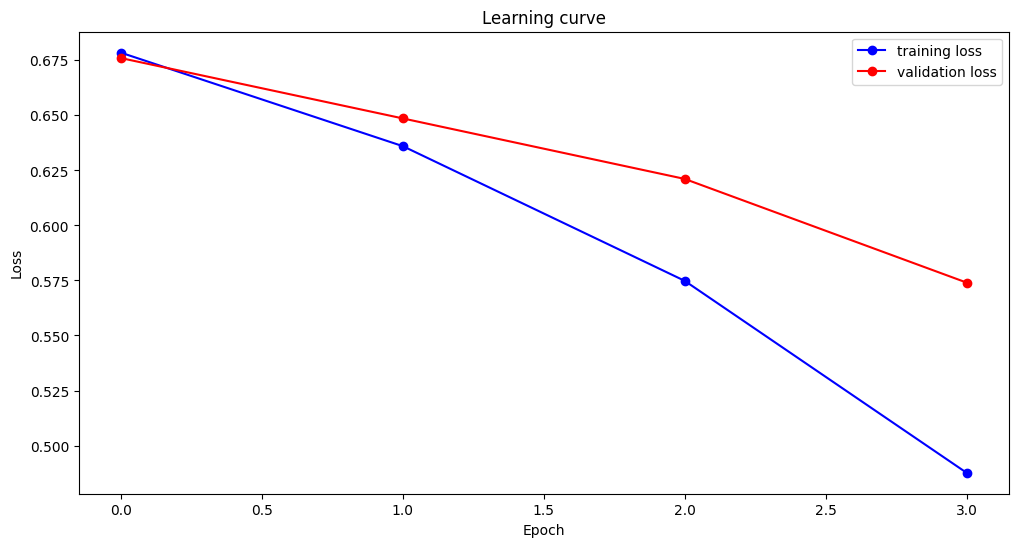

100%|██████████| 5/5 [00:00<00:00,  5.40it/s]


Cross-Entropy Loss for woman: 0.5800996661186218
Training model for gender: man


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/36 [00:00<?, ?it/s]<ipython-input-24-3feab5fb437d>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 5/5 [00:00<00:00,  5.57it/s]


Training loss: 0.6657127208179898, Validation loss: 0.5833046913146973
Epoch 2/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.45it/s]


Training loss: 0.5694180685612891, Validation loss: 0.470937579870224
Epoch 3/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.43it/s]


Training loss: 0.443018333779441, Validation loss: 0.5000495076179504
Epoch 4/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.45it/s]


Training loss: 0.3453664518892765, Validation loss: 0.47094975113868714
Early stopping after 2 epochs with no improvement


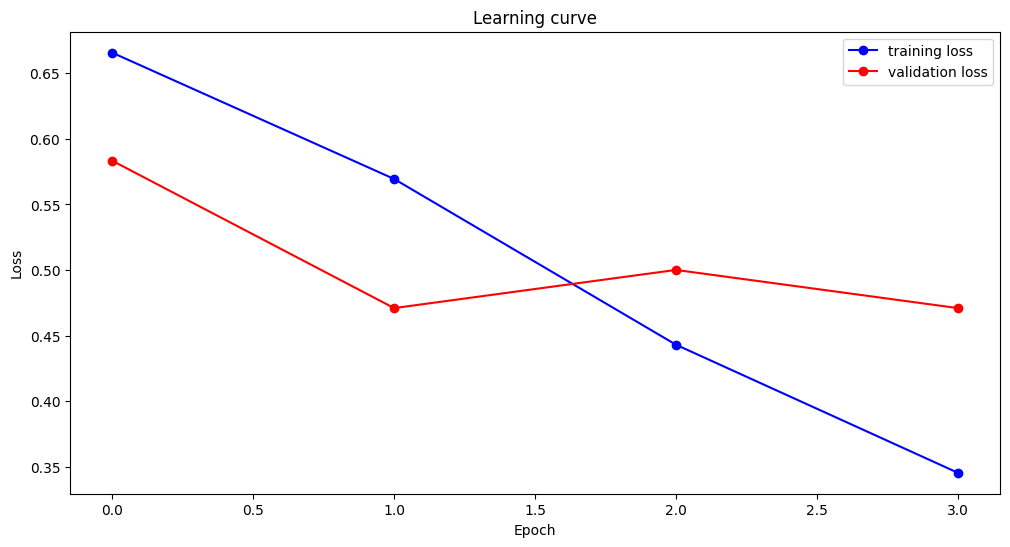

100%|██████████| 5/5 [00:00<00:00,  5.50it/s]


Cross-Entropy Loss for man: 0.519120067358017
Training model for gender: non_binary


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/8 [00:00<?, ?it/s]<ipython-input-24-3feab5fb437d>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Training loss: 0.6971588954329491, Validation loss: 0.6789994239807129
Epoch 2/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.41it/s]


Training loss: 0.6419021934270859, Validation loss: 0.6760131120681763
Epoch 3/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


Training loss: 0.6272899135947227, Validation loss: 0.6686882376670837
Epoch 4/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


Training loss: 0.5977684333920479, Validation loss: 0.6674011945724487


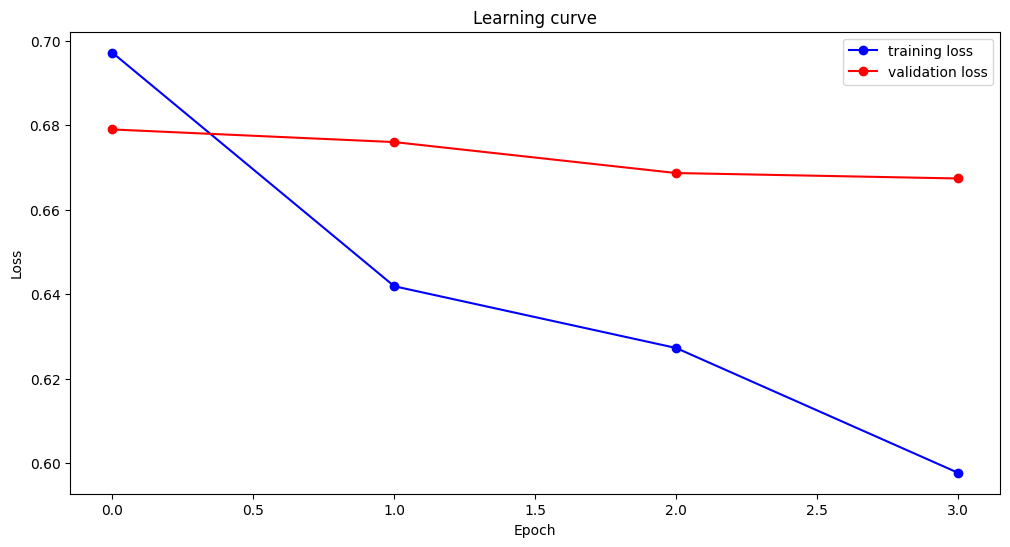

100%|██████████| 1/1 [00:00<00:00,  3.74it/s]


Cross-Entropy Loss for non_binary: 0.642386257648468
Training model for combined data


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/78 [00:00<?, ?it/s]<ipython-input-24-3feab5fb437d>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 10/10 [00:02<00:00,  4.81it/s]


Training loss: 0.6148064889204807, Validation loss: 0.5121207535266876
Epoch 2/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.74it/s]


Training loss: 0.42395923726069623, Validation loss: 0.3509916141629219
Epoch 3/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.74it/s]


Training loss: 0.2716693013715438, Validation loss: 0.2530055493116379
Epoch 4/4
----------


100%|██████████| 10/10 [00:02<00:00,  4.62it/s]


Training loss: 0.1794129048880094, Validation loss: 0.2190228134393692


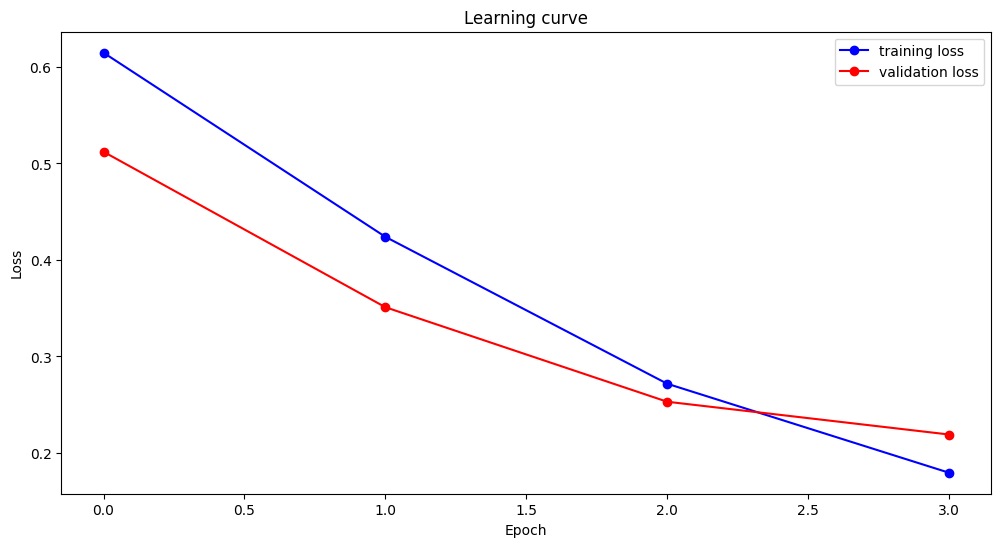

100%|██████████| 10/10 [00:02<00:00,  4.13it/s]

Cross-Entropy Loss for Combined Data: 0.3649290382862091


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, Dataset
import matplotlib.pyplot as plt
import torch
from torch.nn import CrossEntropyLoss

class HateSpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
        return item

    def __len__(self):
        return len(self.labels)

def train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs, patience=2):
    loss_fn = CrossEntropyLoss()  # Define the loss function
    loss_values = []
    validation_loss_values = []
    best_val_loss = float('inf')
    counter = 0

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        print("-" * 10)

        # Training
        model.train()
        total_loss = 0
        for batch in tqdm(train_dataloader):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, torch.argmax(labels, dim=1))
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()
        avg_train_loss = total_loss / len(train_dataloader)
        loss_values.append(avg_train_loss)

        # Validation
        model.eval()
        total_eval_loss = 0
        for batch in tqdm(validation_dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, torch.argmax(labels, dim=1))
            total_eval_loss += loss.item()
        avg_val_loss = total_eval_loss / len(validation_dataloader)
        validation_loss_values.append(avg_val_loss)

        print(f"Training loss: {avg_train_loss}, Validation loss: {avg_val_loss}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping after {patience} epochs with no improvement")
                model.load_state_dict(torch.load('best_model.pt'))
                break

    return loss_values, validation_loss_values

def evaluate_cross_entropy(model, dataloader, device):
    model.eval()
    total_loss = 0
    loss_fn = CrossEntropyLoss()
    for batch in tqdm(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, torch.argmax(labels, dim=1))  # Convert soft labels to hard labels for CE computation
        total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    return avg_loss

def plot_loss_curves(loss_values, validation_loss_values):
    plt.figure(figsize=(12, 6))
    plt.plot(loss_values, 'b-o', label="training loss")
    plt.plot(validation_loss_values, 'r-o', label="validation loss")
    plt.title("Learning curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


# Load the data
gender_files = {
    "woman": "woman_restructured.csv",
    "man": "man_restructured.csv",
    "non_binary": "non_binary_restructured.csv",
    "combined": "combined_df.csv"
}

gender_dfs = {gender: pd.read_csv(filename) for gender, filename in gender_files.items()}

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Specify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def prepare_dataset_and_loaders(df, tokenizer, device):
    # Splitting remains unchanged
    train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['cleaned_text'], df[['soft_label.0', 'soft_label.1']], test_size=.2, random_state=13)
    val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=.5, random_state=13)

    # Tokenization remains unchanged
    train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=128)
    test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=128)

    # Convert labels to torch tensors
    train_labels = torch.tensor(train_labels.values).float()
    val_labels = torch.tensor(val_labels.values).float()
    test_labels = torch.tensor(test_labels.values).float()

    train_dataset = HateSpeechDataset(train_encodings, train_labels)
    val_dataset = HateSpeechDataset(val_encodings, val_labels)
    test_dataset = HateSpeechDataset(test_encodings, test_labels)

    train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
    validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=32)
    test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)

    return train_dataloader, validation_dataloader, test_dataloader, test_labels


# Dictionary to store models for each gender
gender_models = {}

# Train a separate model for each gender
for gender, df in gender_dfs.items():
    if gender == "combined":  # Skip the combined for now, we'll handle it separately after the loop
        continue

    print(f"Training model for gender: {gender}")

    train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(df, tokenizer, device)

    # Initialize the BERT model for binary classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
    model.to(device)

    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.0)
    epochs = 4
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)

    loss_values, validation_loss_values = train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)

    plot_loss_curves(loss_values, validation_loss_values)

    cross_entropy_loss = evaluate_cross_entropy(model, test_dataloader, device)
    print(f"Cross-Entropy Loss for {gender}: {cross_entropy_loss}")

    gender_models[gender] = model

# Train the combined model for binary classification
print("Training model for combined data")

train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(gender_dfs["combined"], tokenizer, device)

# For combined data, initialize the BERT model for binary classification
combined_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
combined_model.to(device)

optimizer = AdamW(combined_model.parameters(), lr=2e-5, weight_decay=0.0)
epochs = 4
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)

loss_values, validation_loss_values = train(combined_model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)

plot_loss_curves(loss_values, validation_loss_values)

cross_entropy_loss_combined = evaluate_cross_entropy(combined_model, test_dataloader, device)
print(f"Cross-Entropy Loss for Combined Data: {cross_entropy_loss_combined}")

baseline_model = combined_model

RACE

In [ ]:
# Split the merged_df based on race
white_df = offensiveness_popquorn[offensiveness_popquorn['race'] == 'White']
asian_df = offensiveness_popquorn[offensiveness_popquorn['race'] == 'Asian']
black_df = offensiveness_popquorn[offensiveness_popquorn['race'] == 'Black or African American']
hispanic_df = offensiveness_popquorn[offensiveness_popquorn['race'] == 'Hispanic or Latino']
native_american_df = offensiveness_popquorn[offensiveness_popquorn['race'] == 'Native American']
arab_american_df = offensiveness_popquorn[offensiveness_popquorn['race'] == 'Arab American']

white_df.head(), asian_df.head(), black_df.head(), hispanic_df.head(), native_american_df.head(), arab_american_df.head()


(   instance_id  user_id                                               text  \
 0          530        0  I think a lot of Dethklok songs use drop C, wo...   
 1          530       43  I think a lot of Dethklok songs use drop C, wo...   
 2          530       93  I think a lot of Dethklok songs use drop C, wo...   
 3          530      111  I think a lot of Dethklok songs use drop C, wo...   
 4          530      125  I think a lot of Dethklok songs use drop C, wo...   
 
    offensiveness gender   race    age  occupation  \
 0            0.0    Man  White  35-39  Unemployed   
 1            0.0    Man  White  35-39    Employed   
 2            0.0    Man  White  30-34    Employed   
 3            0.0  Woman  White  40-44    Employed   
 4            0.0    Man  White  18-24    Employed   
 
                            education  hard_label  soft_label.0  soft_label.1  \
 0  High school diploma or equivalent           0         0.875         0.125   
 1                    Graduate degre

In [ ]:
# Function to restructure dataframes based on the given requirements
def restructure_df(df):
    # Aggregate user_ids by instance_id
    aggregated_user_ids = df.groupby('instance_id')['user_id'].apply(lambda x: ','.join(map(str, x))).reset_index()

    # Select one row for each unique instance_id
    reduced_df = df.drop(columns=['gender', 'race', 'age', 'occupation', 'education']).drop_duplicates(subset='instance_id')

    # Merge the aggregated user_ids
    restructured_df = reduced_df.merge(aggregated_user_ids, on='instance_id', suffixes=('', '_aggregated'))
    restructured_df = restructured_df.drop(columns='user_id')
    restructured_df = restructured_df.rename(columns={'user_id_aggregated': 'user_ids'})

    return restructured_df

# Apply the function to the race-based dataframes
white_restructured = restructure_df(white_df)
asian_restructured = restructure_df(asian_df)
black_restructured = restructure_df(black_df)
hispanic_restructured = restructure_df(hispanic_df)
native_american_restructured = restructure_df(native_american_df)
arab_american_restructured = restructure_df(arab_american_df)

# Combine the race dataframes into one combined dataframe
combined_race_df = pd.concat([white_restructured, asian_restructured, black_restructured, hispanic_restructured,
                              native_american_restructured, arab_american_restructured], ignore_index=True)

# Finding the unique values and their counts for each race category and the combined dataframe
unique_white_counts = white_restructured['offensiveness'].value_counts()
unique_asian_counts = asian_restructured['offensiveness'].value_counts()
unique_black_counts = black_restructured['offensiveness'].value_counts()
unique_hispanic_counts = hispanic_restructured['offensiveness'].value_counts()
unique_native_american_counts = native_american_restructured['offensiveness'].value_counts()
unique_arab_american_counts = arab_american_restructured['offensiveness'].value_counts()
combined_race_df_counts = combined_race_df['offensiveness'].value_counts()

unique_white_counts, unique_asian_counts, unique_black_counts, unique_hispanic_counts, unique_native_american_counts, unique_arab_american_counts, combined_race_df_counts


(0.0    922
 1.0    578
 Name: offensiveness, dtype: int64,
 0.0    394
 1.0    336
 Name: offensiveness, dtype: int64,
 1.0    538
 0.0    529
 Name: offensiveness, dtype: int64,
 0.0    189
 1.0     43
 Name: offensiveness, dtype: int64,
 0.0    212
 1.0     72
 Name: offensiveness, dtype: int64,
 0.0    46
 1.0     3
 Name: offensiveness, dtype: int64,
 0.0    2292
 1.0    1570
 Name: offensiveness, dtype: int64)

In [ ]:
white_restructured.to_csv("white_restructured.csv", index=False)
asian_restructured.to_csv("asian_restructured.csv", index=False)
black_restructured.to_csv("black_restructured.csv", index=False)
hispanic_restructured.to_csv("hispanic_restructured.csv", index=False)
native_american_restructured.to_csv("native_american_restructured.csv", index=False)
arab_american_restructured.to_csv("arab_american_restructured.csv", index=False)
combined_race_df.to_csv("combined_race_df.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, Dataset
import torch

# Define the HateSpeechDataset class
class HateSpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


def train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs, patience=2):
    loss_values = []
    validation_loss_values = []
    best_val_loss = float('inf')  # initially set to infinity
    counter = 0  # count the number of epochs with no improvement in validation loss

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        print("-" * 10)

        # Training
        model.train()
        total_loss = 0
        for batch in tqdm(train_dataloader):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()
        avg_train_loss = total_loss / len(train_dataloader)
        loss_values.append(avg_train_loss)

        # Validation
        model.eval()
        total_eval_loss = 0
        for batch in tqdm(validation_dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_eval_loss += loss.item()
        avg_val_loss = total_eval_loss / len(validation_dataloader)
        validation_loss_values.append(avg_val_loss)

        print(f"Training loss: {avg_train_loss}, Validation loss: {avg_val_loss}")

        # Check if the validation loss has improved
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0  # reset the counter
            torch.save(model.state_dict(), 'best_model.pt')  # save the model weights
        else:
            counter += 1  # increment the counter
            if counter >= patience:
                print(f"Early stopping after {patience} epochs with no improvement")
                model.load_state_dict(torch.load('best_model.pt'))  # load the best model weights
                break

    return loss_values, validation_loss_values


def evaluate(model, dataloader, device):
    model.eval()
    predictions, true_labels = [], []
    for batch in tqdm(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        predictions.append(logits)
        true_labels.append(label_ids)
    predictions = np.concatenate(predictions, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)
    return predictions, true_labels


def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix", cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), title=title, ylabel='True label', xlabel='Predicted label')
    plt.show()


def plot_loss_curves(loss_values, validation_loss_values):
    plt.figure(figsize=(12, 6))
    plt.plot(loss_values, 'b-o', label="training loss")
    plt.plot(validation_loss_values, 'r-o', label="validation loss")
    plt.title("Learning curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Load the data
race_dfs = {
    "white": pd.read_csv("white_restructured.csv"),
    "asian": pd.read_csv("asian_restructured.csv"),
    "black": pd.read_csv("black_restructured.csv"),
    "hispanic": pd.read_csv("hispanic_restructured.csv"),
    "native_american": pd.read_csv("native_american_restructured.csv"),
    #"arab_american": pd.read_csv("arab_american_restructured.csv"),
    "combined": pd.read_csv("combined_race_df.csv")
}

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Specify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modify the prepare_dataset_and_loaders function to use only the cleaned_text column
def prepare_dataset_and_loaders(df, tokenizer, device):
    # Use the cleaned_text column
    train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['cleaned_text'], df['hard_label'], test_size=.2, random_state=13)
    val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=.5, random_state=13)

    train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=128)
    test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=128)

    train_labels = torch.tensor(train_labels.tolist()).long()
    val_labels = torch.tensor(val_labels.tolist()).long()
    test_labels = torch.tensor(test_labels.tolist()).long()

    train_dataset = HateSpeechDataset(train_encodings, train_labels)
    val_dataset = HateSpeechDataset(val_encodings, val_labels)
    test_dataset = HateSpeechDataset(test_encodings, test_labels)

    train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
    validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=32)
    test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)

    return train_dataloader, validation_dataloader, test_dataloader, test_labels

# Train a separate model for each race
race_models = {}
for race, df in race_dfs.items():
    print(f"Training model for race: {race}")
    train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(df, tokenizer, device)
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.0)
    epochs = 4
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)
    loss_values, validation_loss_values = train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)
    predictions, true_labels = evaluate(model, test_dataloader, device)
    print(classification_report(true_labels, predictions.argmax(axis=1)))
    race_models[race] = model

print("Training model for combined data")

train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(race_dfs["combined"], tokenizer, device)
combined_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
combined_model.to(device)
optimizer = AdamW(combined_model.parameters(), lr=2e-5, weight_decay=0.0)
epochs = 4
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)
loss_values, validation_loss_values = train(combined_model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)
predictions, true_labels = evaluate(combined_model, test_dataloader, device)
print(classification_report(true_labels, predictions.argmax(axis=1)))


Training model for race: white


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/36 [00:00<?, ?it/s]<ipython-input-33-0ff653e1f3cb>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 5/5 [00:00<00:00,  5.99it/s]


Training loss: 0.662444555097156, Validation loss: 0.6386844635009765
Epoch 2/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.89it/s]


Training loss: 0.5882787687910928, Validation loss: 0.5597903192043304
Epoch 3/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.57it/s]


Training loss: 0.4734938285417027, Validation loss: 0.5340355694293976
Epoch 4/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.81it/s]


Training loss: 0.3798016450471348, Validation loss: 0.5215396344661712


100%|██████████| 5/5 [00:00<00:00,  5.34it/s]


              precision    recall  f1-score   support

           0       0.74      0.88      0.80        91
           1       0.68      0.45      0.54        51

    accuracy                           0.73       142
   macro avg       0.71      0.67      0.67       142
weighted avg       0.72      0.73      0.71       142

Training model for race: asian


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/18 [00:00<?, ?it/s]<ipython-input-33-0ff653e1f3cb>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 3/3 [00:00<00:00,  7.67it/s]


Training loss: 0.6565181016921997, Validation loss: 0.6443310181299845
Epoch 2/4
----------


100%|██████████| 3/3 [00:00<00:00,  7.90it/s]


Training loss: 0.5690799620416429, Validation loss: 0.6360691587130228
Epoch 3/4
----------


100%|██████████| 3/3 [00:00<00:00,  7.94it/s]


Training loss: 0.44890665345721775, Validation loss: 0.6478993892669678
Epoch 4/4
----------


100%|██████████| 3/3 [00:00<00:00,  7.96it/s]


Training loss: 0.35387247800827026, Validation loss: 0.649016797542572
Early stopping after 2 epochs with no improvement


100%|██████████| 3/3 [00:00<00:00,  7.89it/s]


              precision    recall  f1-score   support

           0       0.71      0.97      0.82        40
           1       0.93      0.47      0.62        30

    accuracy                           0.76        70
   macro avg       0.82      0.72      0.72        70
weighted avg       0.81      0.76      0.74        70

Training model for race: black


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/26 [00:00<?, ?it/s]<ipython-input-33-0ff653e1f3cb>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 4/4 [00:00<00:00,  7.11it/s]


Training loss: 0.6755912739496964, Validation loss: 0.5776009112596512
Epoch 2/4
----------


100%|██████████| 4/4 [00:00<00:00,  7.13it/s]


Training loss: 0.576045383627598, Validation loss: 0.5404659658670425
Epoch 3/4
----------


100%|██████████| 4/4 [00:00<00:00,  7.06it/s]


Training loss: 0.4304679764004854, Validation loss: 0.5016978457570076
Epoch 4/4
----------


100%|██████████| 4/4 [00:00<00:00,  6.98it/s]


Training loss: 0.33863879625613874, Validation loss: 0.4830922856926918


100%|██████████| 4/4 [00:00<00:00,  7.40it/s]


              precision    recall  f1-score   support

           0       0.78      0.80      0.79        61
           1       0.68      0.65      0.67        40

    accuracy                           0.74       101
   macro avg       0.73      0.73      0.73       101
weighted avg       0.74      0.74      0.74       101

Training model for race: hispanic


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/6 [00:00<?, ?it/s]<ipython-input-33-0ff653e1f3cb>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 1/1 [00:00<00:00,  9.04it/s]


Training loss: 0.688102145989736, Validation loss: 0.7520368099212646
Epoch 2/4
----------


100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


Training loss: 0.5947585701942444, Validation loss: 0.7591373920440674
Epoch 3/4
----------


100%|██████████| 1/1 [00:00<00:00,  9.11it/s]


Training loss: 0.589110940694809, Validation loss: 0.764258623123169
Early stopping after 2 epochs with no improvement


100%|██████████| 1/1 [00:00<00:00,  8.55it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       0.00      0.00      0.00        11

    accuracy                           0.52        23
   macro avg       0.26      0.50      0.34        23
weighted avg       0.27      0.52      0.36        23

Training model for race: native_american


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-33-0ff653e1f3cb>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


Training loss: 0.6950796161379132, Validation loss: 0.6695773005485535
Epoch 2/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.66it/s]


Training loss: 0.65582617691585, Validation loss: 0.6320574879646301
Epoch 3/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


Training loss: 0.6312555755887713, Validation loss: 0.6310257315635681
Epoch 4/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.88it/s]


Training loss: 0.5882691655840192, Validation loss: 0.6376294493675232


100%|██████████| 1/1 [00:00<00:00,  6.57it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      1.00      0.65        13
           1       0.00      0.00      0.00        14

    accuracy                           0.48        27
   macro avg       0.24      0.50      0.33        27
weighted avg       0.23      0.48      0.31        27

Training model for race: combined


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-33-0ff653e1f3cb>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 12/12 [00:02<00:00,  5.02it/s]


Training loss: 0.539202480374471, Validation loss: 0.3057328350841999
Epoch 2/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.98it/s]


Training loss: 0.21901746810940298, Validation loss: 0.18772385672976574
Epoch 3/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.94it/s]


Training loss: 0.07461000721820671, Validation loss: 0.14095167148237428
Epoch 4/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.93it/s]


Training loss: 0.03418260965617779, Validation loss: 0.13603719409244755


100%|██████████| 12/12 [00:02<00:00,  5.06it/s]


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       218
           1       0.94      0.93      0.94       147

    accuracy                           0.95       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.95      0.95      0.95       365

Training model for combined data


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-33-0ff653e1f3cb>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
100%|██████████| 12/12 [00:02<00:00,  4.92it/s]


Training loss: 0.545005720756624, Validation loss: 0.3019641637802124
Epoch 2/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.93it/s]


Training loss: 0.211413970257601, Validation loss: 0.19143636835118136
Epoch 3/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.87it/s]


Training loss: 0.06554448619768348, Validation loss: 0.18448877272506556
Epoch 4/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.92it/s]


Training loss: 0.03151410534147821, Validation loss: 0.16680534401287636


100%|██████████| 12/12 [00:02<00:00,  5.08it/s]

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       218
           1       0.96      0.95      0.96       147

    accuracy                           0.96       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



Training model for race: white


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/36 [00:00<?, ?it/s]<ipython-input-35-6b2bb00c11cf>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 5/5 [00:00<00:00,  6.22it/s]


Training loss: 0.6661653137869306, Validation loss: 0.6333043575286865
Epoch 2/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.98it/s]


Training loss: 0.5854556411504745, Validation loss: 0.538948392868042
Epoch 3/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.93it/s]


Training loss: 0.41515790215796894, Validation loss: 0.5257485091686249
Epoch 4/4
----------


100%|██████████| 5/5 [00:00<00:00,  5.77it/s]


Training loss: 0.3165232170787122, Validation loss: 0.5167388916015625
Training model for race: asian


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/18 [00:00<?, ?it/s]<ipython-input-35-6b2bb00c11cf>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 3/3 [00:00<00:00,  8.01it/s]


Training loss: 0.6990562511814965, Validation loss: 0.6419223149617513
Epoch 2/4
----------


100%|██████████| 3/3 [00:00<00:00,  8.02it/s]


Training loss: 0.6313058932622274, Validation loss: 0.6123428742090861
Epoch 3/4
----------


100%|██████████| 3/3 [00:00<00:00,  7.98it/s]


Training loss: 0.5589756717284521, Validation loss: 0.558817724386851
Epoch 4/4
----------


100%|██████████| 3/3 [00:00<00:00,  8.07it/s]


Training loss: 0.4660351127386093, Validation loss: 0.5247233510017395
Training model for race: black


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/26 [00:00<?, ?it/s]<ipython-input-35-6b2bb00c11cf>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 4/4 [00:00<00:00,  7.19it/s]


Training loss: 0.6642027428516974, Validation loss: 0.599494956433773
Epoch 2/4
----------


100%|██████████| 4/4 [00:00<00:00,  7.10it/s]


Training loss: 0.5605077646099604, Validation loss: 0.5525784194469452
Epoch 3/4
----------


100%|██████████| 4/4 [00:00<00:00,  7.08it/s]


Training loss: 0.4445833202738028, Validation loss: 0.6747299879789352
Epoch 4/4
----------


100%|██████████| 4/4 [00:00<00:00,  7.07it/s]


Training loss: 0.368859452696947, Validation loss: 0.5767112448811531
Early stopping after 2 epochs with no improvement
Training model for race: hispanic


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/6 [00:00<?, ?it/s]<ipython-input-35-6b2bb00c11cf>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 1/1 [00:00<00:00,  9.30it/s]


Training loss: 0.6401319801807404, Validation loss: 0.7375400066375732
Epoch 2/4
----------


100%|██████████| 1/1 [00:00<00:00,  9.14it/s]


Training loss: 0.5972667336463928, Validation loss: 0.7414928078651428
Epoch 3/4
----------


100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


Training loss: 0.5647846062978109, Validation loss: 0.735524594783783
Epoch 4/4
----------


100%|██████████| 1/1 [00:00<00:00,  9.06it/s]


Training loss: 0.5531125068664551, Validation loss: 0.7326050400733948
Training model for race: native_american


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/7 [00:00<?, ?it/s]<ipython-input-35-6b2bb00c11cf>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 1/1 [00:00<00:00,  6.70it/s]


Training loss: 0.6956580451556614, Validation loss: 0.6289234161376953
Epoch 2/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


Training loss: 0.6745260953903198, Validation loss: 0.6381006836891174
Epoch 3/4
----------


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


Training loss: 0.6318541169166565, Validation loss: 0.6628479361534119
Early stopping after 2 epochs with no improvement
Training model for combined data


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/4
----------


  0%|          | 0/92 [00:00<?, ?it/s]<ipython-input-35-6b2bb00c11cf>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
100%|██████████| 12/12 [00:02<00:00,  4.94it/s]


Training loss: 0.5602066228571145, Validation loss: 0.31228190908829373
Epoch 2/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.95it/s]


Training loss: 0.22365044701196576, Validation loss: 0.17167617256442705
Epoch 3/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.93it/s]


Training loss: 0.062119304911112005, Validation loss: 0.12544441440453133
Epoch 4/4
----------


100%|██████████| 12/12 [00:02<00:00,  4.96it/s]


Training loss: 0.02612871081446824, Validation loss: 0.1274878705929344


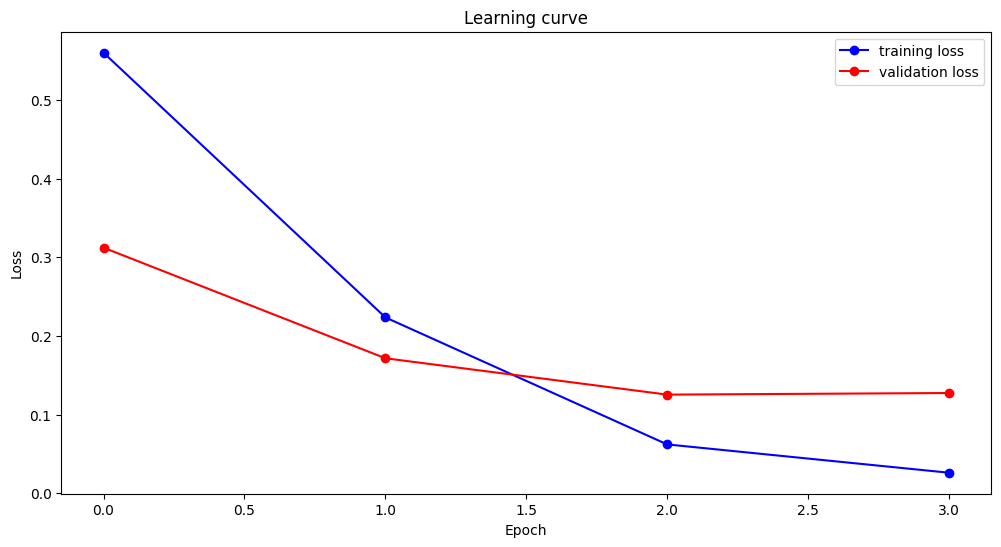

100%|██████████| 12/12 [00:02<00:00,  5.10it/s]

Cross-Entropy Loss for Combined Data: 0.1464588347977648


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, Dataset
import matplotlib.pyplot as plt
import torch
from torch.nn import CrossEntropyLoss

class HateSpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx, :])  # Assuming labels is a 2D numpy array with shape (n_samples, 2)
        return item

    def __len__(self):
        return len(self.labels)

def train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs, patience=2):
    loss_fn = CrossEntropyLoss()  # Define the loss function
    loss_values = []
    validation_loss_values = []
    best_val_loss = float('inf')
    counter = 0

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        print("-" * 10)

        # Training
        model.train()
        total_loss = 0
        for batch in tqdm(train_dataloader):
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, torch.argmax(labels, dim=1))
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()
        avg_train_loss = total_loss / len(train_dataloader)
        loss_values.append(avg_train_loss)

        # Validation
        model.eval()
        total_eval_loss = 0
        for batch in tqdm(validation_dataloader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            with torch.no_grad():
                outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = loss_fn(logits, torch.argmax(labels, dim=1))
            total_eval_loss += loss.item()
        avg_val_loss = total_eval_loss / len(validation_dataloader)
        validation_loss_values.append(avg_val_loss)

        print(f"Training loss: {avg_train_loss}, Validation loss: {avg_val_loss}")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping after {patience} epochs with no improvement")
                model.load_state_dict(torch.load('best_model.pt'))
                break

    return loss_values, validation_loss_values

def evaluate_cross_entropy(model, dataloader, device):
    model.eval()
    total_loss = 0
    loss_fn = CrossEntropyLoss()
    for batch in tqdm(dataloader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = loss_fn(logits, torch.argmax(labels, dim=1))  # Convert soft labels to hard labels for CE computation
        total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    return avg_loss

def plot_loss_curves(loss_values, validation_loss_values):
    plt.figure(figsize=(12, 6))
    plt.plot(loss_values, 'b-o', label="training loss")
    plt.plot(validation_loss_values, 'r-o', label="validation loss")
    plt.title("Learning curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


# Load the data
race_dfs = {
    "white": pd.read_csv("white_restructured.csv"),
    "asian": pd.read_csv("asian_restructured.csv"),
    "black": pd.read_csv("black_restructured.csv"),
    "hispanic": pd.read_csv("hispanic_restructured.csv"),
    "native_american": pd.read_csv("native_american_restructured.csv"),
    #"arab_american": pd.read_csv("arab_american_restructured.csv"),
    "combined": pd.read_csv("combined_race_df.csv")
}

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Specify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def prepare_dataset_and_loaders(df, tokenizer, device):
    # Splitting remains unchanged
    train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['cleaned_text'], df[['soft_label.0', 'soft_label.1']], test_size=.2, random_state=13)
    val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=.5, random_state=13)

    # Tokenization remains unchanged
    train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=128)
    test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=128)

    # Convert labels to torch tensors
    train_labels = torch.tensor(train_labels.values).float()
    val_labels = torch.tensor(val_labels.values).float()
    test_labels = torch.tensor(test_labels.values).float()

    train_dataset = HateSpeechDataset(train_encodings, train_labels)
    val_dataset = HateSpeechDataset(val_encodings, val_labels)
    test_dataset = HateSpeechDataset(test_encodings, test_labels)

    train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32)
    validation_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=32)
    test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=32)

    return train_dataloader, validation_dataloader, test_dataloader, test_labels


# Dictionary to store models for each race
race_models = {}

# Train a separate model for each race
for race, df in race_dfs.items():
    if race == "combined":  # Skip the combined for now, we'll handle it separately after the loop
        continue

    print(f"Training model for race: {race}")

    train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(df, tokenizer, device)

    # Initialize the BERT model for binary classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
    model.to(device)

    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.0)
    epochs = 4
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)

    loss_values, validation_loss_values = train(model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)

    # Storing the trained model in the dictionary
    race_models[race] = model

# Train the combined model for binary classification
print("Training model for combined data")

train_dataloader, validation_dataloader, test_dataloader, test_labels = prepare_dataset_and_loaders(race_dfs["combined"], tokenizer, device)

# For combined data, initialize the BERT model for binary classification
combined_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
combined_model.to(device)

optimizer = AdamW(combined_model.parameters(), lr=2e-5, weight_decay=0.0)
epochs = 4
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * epochs)

loss_values, validation_loss_values = train(combined_model, train_dataloader, validation_dataloader, optimizer, scheduler, device, epochs)

plot_loss_curves(loss_values, validation_loss_values)

cross_entropy_loss_combined = evaluate_cross_entropy(combined_model, test_dataloader, device)
print(f"Cross-Entropy Loss for Combined Data: {cross_entropy_loss_combined}")

baseline_model = combined_model